In [25]:
x = 5
print(x * 3)

y = 'stock'
print(y * 3)

print(x + 3)

pi = 3.14159
print(type(pi))

pi_string = str(pi)
print(type(pi_string))

def func():
    return print('hello guyz')


15
stockstockstock
8
<class 'float'>
<class 'str'>
hello guyz
hello guyz


In [26]:
add_two_num = 1 + 1414 + 13
subtract_two_num = 7826478 - 2781456
multiply_two_num = 15*5
divide_two_num = 1455/5

print(add_two_num)
print()
print(subtract_two_num)
print()
print(multiply_two_num)
print()
print(divide_two_num)

1428

5045022

75

291.0


In [27]:
my_data = 12
def func(x):
    y = x**2
    return y

func(my_data)

144

Let us now look at two built-inPython libraries. When it comes to financial data management, two of the most frequently used Python packages/libraries are Pandas as Numpy. A funciton can be easliy called only after we import the library. This is why the command for importing libraries is always put at the beginning of a script. To employ the pandas library, we it on the notebook. This line means that jupyter is told to import the pandas library and assigns it a short name, pd, for ease of reference. One of the first steps of every statistical analysis is importing the dataset to be analysed into the software. Depending on the format of the data there are different weys of accomplishing this task. 


In [93]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller

This study conducts a comprehensive analysis of monthly USD/TRY and EUR/TRY exchange rates from Q1 2012 to October 2024. Data, acquired from the Turkish Central Bank’s EVDS database, consists of separate buying and selling rates, later averaged into a 'basket' rate for consistency. Initially, the analysis focuses on USD/TRY before moving to EUR/TRY in parallel, applying various time series methods to capture both trend and seasonality. The primary methodological framework includes **Moving Averages and Smoothing Techniques**, such as centered moving averages, simple exponential smoothing, and the Holt-Winters model. These techniques smooth the data, helping reveal trend and seasonal components effectively. **Stationarity** of the series is then assessed through the Augmented Dickey-Fuller (ADF) test, which identifies whether transformations, like differencing or logarithmic adjustments, are needed to stabilize mean and variance over time. Once stationarity is confirmed, **Model Selection and Forecasting** proceeds using both additive and multiplicative decompositions to select a model aligned with the data’s structure. Further, advanced forecasting models, including **Holt's linear (two-parameter) and seasonal (three-parameter) adjustments**, as well as **exponential trend modeling**, are applied. For series with substantial trend and seasonal components, Box-Jenkins ARMA modeling will enhance forecast precision. **Autocorrelation Analysis** through autocorrelation and partial autocorrelation functions (normalized via Bartlett’s correction) assesses whether trend components need to be removed. The theoretical basis for these methods rests on stochastic process principles, where a real-valued time series $ Y(t, \omega) $ in probability space $ (\Omega, F, \rho) $ forms a stochastic process $ \{Y_t, t \in T\} $, a sequence of random variables evolving over time. Detailed mathematical formulations supporting each step will follow in later sections. **Trend Component Analysis** distinguishes between linear and nonlinear growth or decline over the long term, as expressed by the trend function $ Y_t = f(t) $. **Seasonal Components** are addressed by observing recurring patterns in monthly exchange rates. Additionally, **Cyclical Components**, characterized by longer-term fluctuations influenced by economic policies, are examined. To assess the multiplicative or additive structure of each series, **Exponential Trend Modeling** is applied. For example, if the series changes by a fixed percentage over time, it is expressed in log-linear form as:
$$
\ln Y_t = \ln \alpha + \beta t
$$
where $ \beta $ denotes the average growth rate. The average growth rate can also be calculated from the log differences as:
$$
\ln(Y_t) - \ln(Y_{t-1}) = \beta
$$

The **Autocorrelation** assessment evaluates the relationship between observations at different time points. Should autocorrelation be detected, especially within error terms, it indicates model limitations and necessitates adjustments for accuracy in economic forecasting. This investigation seeks to verify assumptions foundational to econometrics, ensuring that any model selected has met statistical rigor. This study thus combines traditional econometric approaches with advanced forecasting, supported by rigorous mathematical analysis, providing a robust framework for modeling and predicting exchange rate movements in USD/TRY and EUR/TRY.


In [90]:
foreign = pd.read_excel("usd_eur.xlsx", index_col=0, parse_dates=['date']) 
print(foreign)

             usd_alis  usd_satis   eur_alis  eur_satis
date                                                  
2012-04-01   1.779840   1.788420   2.343220   2.354530
2012-05-01   1.796955   1.805627   2.305236   2.316350
2012-06-01   1.816071   1.824833   2.274657   2.285619
2012-07-01   1.804886   1.813591   2.222205   2.232927
2012-08-01   1.785840   1.794440   2.211280   2.221940
...               ...        ...        ...        ...
2024-06-01  32.462747  32.521235  34.981735  35.044771
2024-07-01  32.835327  32.894495  35.576541  35.640645
2024-08-01  33.560781  33.621248  36.906657  36.973152
2024-09-01  33.969271  34.030467  37.715176  37.783114
2024-10-01  34.168195  34.229755  37.364575  37.431895

[151 rows x 4 columns]


In [41]:
print(foreign.head(1))
print(foreign_dataset.tail(1))

            usd_alis  usd_satis  eur_alis  eur_satis
date                                                
2012-04-01   1.77984    1.78842   2.34322    2.35453
             usd_alis  usd_satis   eur_alis  eur_satis
date                                                  
2024-10-01  34.168195  34.229755  37.364575  37.431895


The calculation presented derives a "basket" exchange rate for both USD and EUR by averaging their respective buying and selling rates. This can be represented mathematically as follows: $\text{usd\_sepet} = \frac{\text{usd\_alis} + \text{usd\_satis}}{2}$, $\text{eur\_sepet} = \frac{\text{eur\_alis} + \text{eur\_satis}}{2}$. Here, $\text{usd\_alis}$ and $\text{usd\_satis}$ represent the buying and selling rates for USD, respectively, while $\text{eur\_alis}$ and $\text{eur\_satis}$ represent those for EUR. By calculating the midpoint or average of each pair, the "basket" rate provides a single value that balances out fluctuations from individual buy or sell rates. This approach offers a stable reference for analyzing currency trends over time, as it mitigates any discrepancies caused by momentary shifts in either direction of the exchange rate.

**Warning:** alis means buy, satis means sale.

In [54]:
# USD, EUR Basket Calculations;
foreign_dataset['usd_sepet'] = (foreign_dataset['usd_alis'] + foreign_dataset['usd_satis']) / 2
foreign_dataset['eur_sepet'] = (foreign_dataset['eur_alis'] + foreign_dataset['eur_satis']) / 2
print(foreign_dataset.head())

            usd_alis  usd_satis  eur_alis  eur_satis  usd_sepet  eur_sepet
date                                                                      
2012-04-01  1.779840   1.788420  2.343220   2.354530   1.784130   2.348875
2012-05-01  1.796955   1.805627  2.305236   2.316350   1.801291   2.310793
2012-06-01  1.816071   1.824833  2.274657   2.285619   1.820452   2.280138
2012-07-01  1.804886   1.813591  2.222205   2.232927   1.809239   2.227566
2012-08-01  1.785840   1.794440  2.211280   2.221940   1.790140   2.216610


To observe the structure of the original usd_basket time series visually, a simple exponential smoothing (SES) technique was applied, with a confidence interval based on the smoothed series' standard deviation. Observations indicated that the original usd_basket series remained within the confidence band created from the SES, although it approached the band between 2022 and 2024, reflecting potential fluctuations or volatility during that period. SES is a weighted moving average method, particularly useful for forecasting time series with a stationary level but without significant trend or seasonality. The SES method forecasts by applying exponentially declining weights to past data, where older data points hold progressively less importance. The mathematical formula for SES is as follows:

usd_bask
𝑡
+
1
=
𝛼
usd_bask
𝑡
+
1
+
(
1
−
𝛼
)
usd_bask
𝑡
usd_bask 
t+1
​
 =αusd_bask 
t+1
​
 +(1−α)usd_bask 
t
​
 
where $ \alpha $ represents the smoothing parameter (between 0 and 1), $ \text{usd_bask}_t $ is the actual data value at time $ t $, and $ \text{usd_bask}t $ is the level component. The forecast $ F{t+m} $ is then simply the level component at $ t $, as SES assumes that future values will mirror the current level. This formula can expand recursively as:

usd_bask
𝑡
=
𝛼
usd_bask
𝑡
+
(
1
−
𝛼
)
usd_bask
𝑡
−
1
=
𝛼
usd_bask
𝑡
+
(
1
−
𝛼
)
(
𝛼
usd_bask
𝑡
−
1
+
(
1
−
𝛼
)
usd_bask
𝑡
−
2
)
+
…
usd_bask 
t
​
 =αusd_bask 
t
​
 +(1−α)usd_bask 
t−1
​
 =αusd_bask 
t
​
 +(1−α)(αusd_bask 
t−1
​
 +(1−α)usd_bask 
t−2
​
 )+…
which ultimately weights all past values but increasingly diminishes their impact as the sequence extends. In relation to Winston Churchill's quote, "The farther backward you can look, the farther forward you can see," one might infer a preference for setting forecasting parameters with an emphasis on the significance of historical data. Therefore, Churchill might favor exponential smoothing with $ \alpha < 1 $, where a smaller $ \alpha $ would ensure historical data are factored into future predictions with more significance than a larger $ \alpha $.

C:\Users\Muhammed İkbal\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


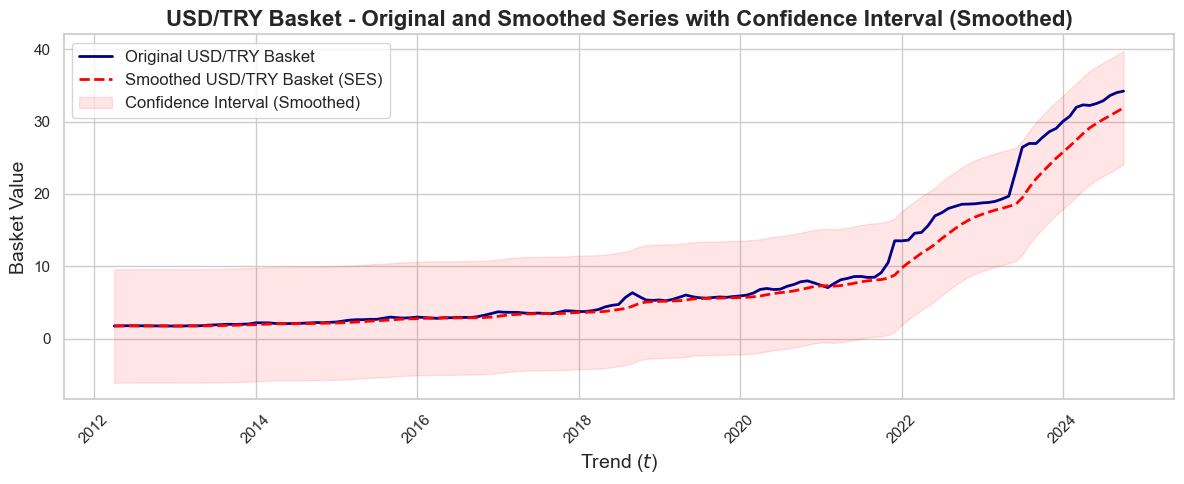

In [125]:
# Simple Exponential Smoothing;
usd_sepet = foreign_dataset['usd_sepet']
smoothing_model = SimpleExpSmoothing(usd_sepet).fit(smoothing_level=0.2, optimized=False)
usd_sepet_smoothed = smoothing_model.fittedvalues
std_dev_smoothed = usd_sepet_smoothed.std()
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")
plt.plot(usd_sepet, color='darkblue', linewidth=2, label='Original USD/TRY Basket')
# Plot smoothed series with confidence interval
plt.plot(usd_sepet_smoothed, color='red', linestyle='--', linewidth=2, label='Smoothed USD/TRY Basket (SES)')
plt.fill_between(usd_sepet_smoothed.index, usd_sepet_smoothed - std_dev_smoothed, usd_sepet_smoothed + std_dev_smoothed, 
                 color='red', alpha=0.1, label='Confidence Interval (Smoothed)')
plt.title('USD/TRY Basket - Original and Smoothed Series with Confidence Interval (Smoothed)', fontsize=16, fontweight='bold')
plt.xlabel('Trend ($t$)', fontsize=14)
plt.ylabel('Basket Value', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It is evident that the usd_bask variable exhibits an exponential pattern. In this case, we will examine the presence of a trend, which could be seasonality or another type of distortion. Initially, it appears that the series has an exponential trend and unit root presence. The components forming the time series are Trend (T), Seasonal Change (M), Cyclical Movements (D), and Random Movements (R), with random change being an essential component. Time series can follow either an additive or multiplicative structure. Additive structure: $Y_t = T_t + M_t + D_t + R_t$; Multiplicative structure: $Y_t = T_t \cdot M_t \cdot D_t \cdot R_t$. **Stationarity** is evaluated in two types. **5.2.1 Covariance Stationarity (Weak Stationarity)**: If the 1st and 2nd moments of the $Y_t$ series are independent of time $t$, the process is called covariance stationary or weakly stationary. For weak stationarity: $\mathbb{E}(Y_t) = \mathbb{E}(Y_{t-j}) = \mu$ and $\text{Var}(Y_t) = \text{Var}(Y_{t-j}) = \sigma^2$ must hold. Autocovariance: $\gamma_k = \mathbb{E}[(Y_t - \mu)(Y_{t-k} - \mu)]$ must be independent of time difference $t$ and $t-k$ for all k; if so, the process is weakly stationary. **Example**: $y_t = \mu + \epsilon_t$, where $\epsilon_t \sim \mathcal{N}(0, \sigma^2)$ is an independent process. Mean: $\mathbb{E}(y_t) = \mu$ and autocovariance: $\mathbb{E}[(y_t - \mu)(y_{t-j} - \mu)] = 0$, the process is covariance stationary. However, for $Y_t = \beta t + \epsilon_t$, $\mathbb{E}(Y_t) = \beta t$, indicating that the 1st moment is time-dependent, hence it is not covariance stationary. **5.2.2 Strong Stationarity**: If the joint distributions of a time series are identical across different time periods, the process is called strongly stationary; in most applications, weak stationarity suffices. **Trend Analysis**: A linear trend model is suitable when the $Y_t$ series shows a constant increase or decrease, and the model is: $Y_t = \alpha + \beta t$, where $t$ is the time variable (years, periods, etc.), and $\alpha$ and $\beta$ are parameters. In the case of an exponential trend model, where $Y_t$ series changes at a constant percentage rate, the model is: $Y_t^* = \alpha e^{\beta t}$. Taking the natural logarithm gives the log-linear form: $\ln Y_t = \ln \alpha + \beta t$; $\beta$ represents the average growth rate.


In [117]:
foreign_dataset['t'] = range(1, len(foreign_dataset) + 1)
foreign_dataset['log_usd_sepet'] = np.log(foreign_dataset['usd_sepet'])
X = foreign_dataset[['t']]
X = sm.add_constant(X)
y = foreign_dataset['log_usd_sepet']
model = sm.OLS(y, X).fit()
print(model.summary())
foreign_dataset['usd_sepet_pred'] = np.exp(model.predict(X))
print(foreign_dataset[['t', 'usd_sepet', 'usd_sepet_pred']].head())

                            OLS Regression Results                            
Dep. Variable:          log_usd_sepet   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2566.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           8.14e-96
Time:                        00:53:58   Log-Likelihood:                 20.200
No. Observations:                 151   AIC:                            -36.40
Df Residuals:                     149   BIC:                            -30.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1780      0.035      5.106      0.0

These results indicate that the model struggles to capture the true trend of usd_sepet, as it has difficulty fitting the data and its predictions deviate significantly from actual observations. This discrepancy stems from the high beta parameter and the low starting value of the alpha parameter. Alternatively, to achieve a better fit, you might consider linearizing the series by applying a log transformation. You could also explore other models, such as seasonal or linear trends, as the exponential trend appears misaligned with the observed rate of change in the data. These results aim to estimate usd_sepet based on an exponential trend model and evaluate the significance of the trend variable $t$. The R-squared value ($R^2$) is quite high at 0.945, meaning that the model explains approximately 94.5% of the variance in the dependent variable log_usd_sepet. This high explanatory power indicates a strong effect of the $t$ variable on usd_sepet. The adjusted $R^2$ (Adj. $R^2$) is also 0.945, suggesting that the model provides a good fit overall, without any overfitting. The F-statistic value is calculated as 2566, with an associated significance level (Prob($F$-statistic)) close to zero. This supports the overall significance of the model and that the independent variable ($t$) is a consistent and meaningful explanatory factor in the model. From the significance test of the coefficients, the intercept (const) coefficient is $0.1780$, with a t-value of 5.106 and a p-value of 0.000. Since the p-value is below 0.05, the intercept is statistically significant. The coefficient for the $t$ variable is estimated at 0.0202; this coefficient reflects the growth rate in the log-transformed usd_sepet variable. The t-value of $50.658$ is notably high, and the p-value is very close to zero, indicating that the $t$ variable is highly significant in the model. Given the significance of the $t$ variable, retaining it in the model appears sensible for accurately forecasting usd_sepet. The Durbin-Watson statistic is calculated at $0.040$, a low value suggesting positive autocorrelation in the model’s residuals. This result hints that usd_sepet may contain time-dependent components, and correcting for autocorrelation within the time series could improve model accuracy. The p-values of the Omnibus and Jarque-Bera tests are quite low, indicating that residuals deviate from a normal distribution. Although normality in residuals is not strictly required in exponential trend models, it might be worth addressing to improve prediction accuracy. Overall, the explanatory power of the exponential trend model on the $usd_sepet$ variable is high, and the model meaningfully represents the growth rate of usd_sepet over time. The results show that $usd_sepet$ exhibits a positive time-dependent trend, suggesting an upward growth trend. Based on these findings, USD could continue appreciating at a similar growth rate in the future; specifically, the logarithmic growth rate against time indicates a gradual but steady value gain in $usd_sepet$. This situation suggests that $usd_sepet$ might maintain its value increase in line with an exponential trend in the broader economy, although it is essential to consider the influence of other economic and geopolitical factors. The exponential trend reflects USD's value increase at a positive growth rate, although potential external factors (seasonality, cyclical variations, or autocorrelation effects) could slow or accelerate the trend at times.

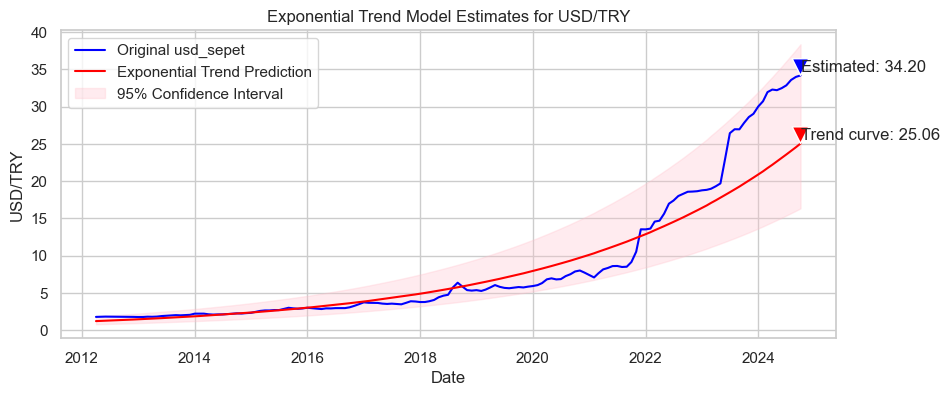

In [150]:
foreign_dataset['usd_sepet_pred'] = np.exp(model.predict(X))
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)
foreign_dataset['ci_lower'] = np.exp(pred_summary['obs_ci_lower'])
foreign_dataset['ci_upper'] = np.exp(pred_summary['obs_ci_upper'])

plt.figure(figsize=(10, 4))
# Orijinal usd_sepet verisi
plt.plot(foreign_dataset.index, foreign_dataset['usd_sepet'], label='Original usd_sepet', color='blue')
# Üstel trend tahmini
plt.plot(foreign_dataset.index, foreign_dataset['usd_sepet_pred'], label='Exponential Trend Prediction', color='red')
# Güven aralığı
plt.fill_between(foreign_dataset.index, foreign_dataset['ci_lower'], foreign_dataset['ci_upper'], color='pink', alpha=0.3, label='95% Confidence Interval')

# Son değerlerin anotasyonu
last_date = foreign_dataset.index[-1]
last_usd_sepet = foreign_dataset['usd_sepet'].iloc[-1]
last_usd_sepet_pred = foreign_dataset['usd_sepet_pred'].iloc[-1]

plt.annotate(f'Estimated: {last_usd_sepet:.2f}', 
             xy=(last_date, last_usd_sepet), 
             xytext=(last_date, last_usd_sepet + 0.5),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'Trend curve: {last_usd_sepet_pred:.2f}', 
             xy=(last_date, last_usd_sepet_pred), 
             xytext=(last_date, last_usd_sepet_pred + 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel('Date')
plt.ylabel('USD/TRY')
plt.title('Exponential Trend Model Estimates for USD/TRY')
plt.legend()
plt.show()

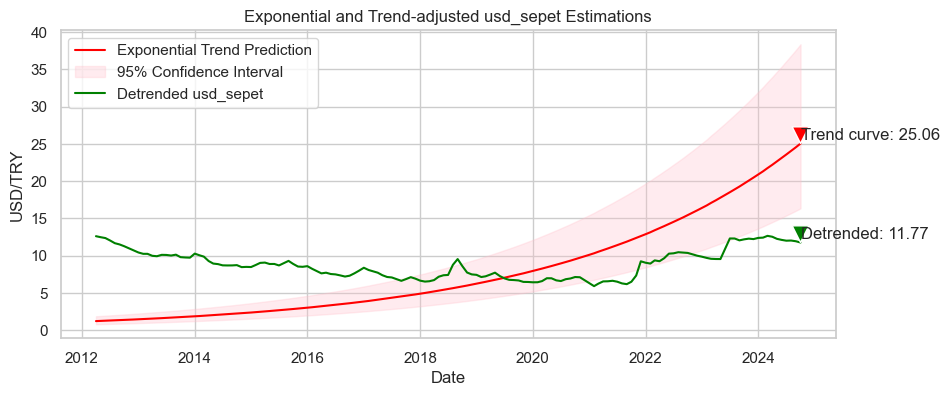

In [149]:
foreign_dataset['t'] = range(1, len(foreign_dataset) + 1)
foreign_dataset['log_usd_sepet'] = np.log(foreign_dataset['usd_sepet'])
X = foreign_dataset[['t']]
X = sm.add_constant(X)
y = foreign_dataset['log_usd_sepet']
model = sm.OLS(y, X).fit()
foreign_dataset['usd_sepet_trend'] = model.predict(X)
foreign_dataset['usd_sepet_detrended'] = foreign_dataset['log_usd_sepet'] - foreign_dataset['usd_sepet_trend']
foreign_dataset['usd_sepet_detrended_original_scale'] = np.exp(foreign_dataset['usd_sepet_detrended']) * np.mean(foreign_dataset['usd_sepet'])

# Güven aralığını hesapla
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)
foreign_dataset['ci_lower'] = np.exp(pred_summary['obs_ci_lower'])
foreign_dataset['ci_upper'] = np.exp(pred_summary['obs_ci_upper'])

plt.figure(figsize=(10, 4))
# Üstel trend tahmini
plt.plot(foreign_dataset.index, np.exp(foreign_dataset['usd_sepet_trend']), label='Exponential Trend Prediction', color='red')
# Güven aralığı
plt.fill_between(foreign_dataset.index, foreign_dataset['ci_lower'], foreign_dataset['ci_upper'], color='pink', alpha=0.3, label='95% Confidence Interval')
# Trendden arındırılmış usd_sepet verisi
plt.plot(foreign_dataset.index, foreign_dataset['usd_sepet_detrended_original_scale'], label='Detrended usd_sepet', color='green')

# Son değerlerin anotasyonu
last_date = foreign_dataset.index[-1]
last_usd_sepet_detrended = foreign_dataset['usd_sepet_detrended_original_scale'].iloc[-1]
last_usd_sepet_pred = np.exp(foreign_dataset['usd_sepet_trend'].iloc[-1])

plt.annotate(f'Detrended: {last_usd_sepet_detrended:.2f}', 
             xy=(last_date, last_usd_sepet_detrended), 
             xytext=(last_date, last_usd_sepet_detrended + 0.5),
             arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Trend curve: {last_usd_sepet_pred:.2f}', 
             xy=(last_date, last_usd_sepet_pred), 
             xytext=(last_date, last_usd_sepet_pred + 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('Date')
plt.ylabel('USD/TRY')
plt.title('Exponential and Trend-adjusted usd_sepet Estimations')
plt.legend()
plt.show()

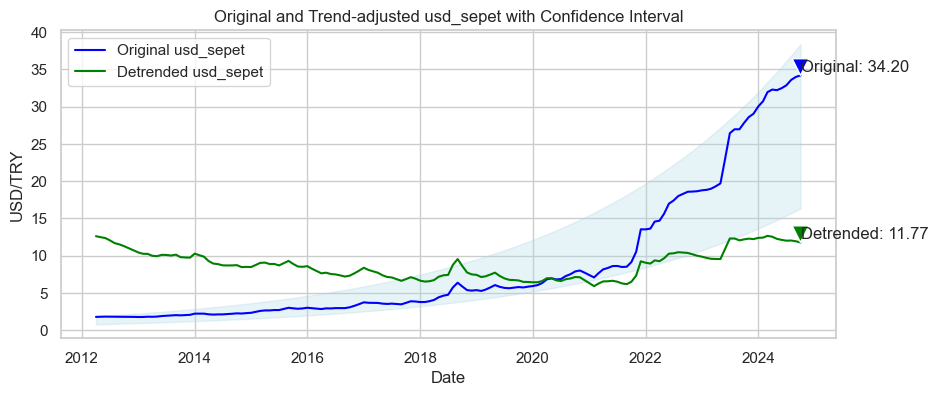

In [154]:
foreign_dataset['t'] = range(1, len(foreign_dataset) + 1)
foreign_dataset['log_usd_sepet'] = np.log(foreign_dataset['usd_sepet'])
X = foreign_dataset[['t']]
X = sm.add_constant(X)
y = foreign_dataset['log_usd_sepet']
model = sm.OLS(y, X).fit()
foreign_dataset['usd_sepet_trend'] = model.predict(X)
foreign_dataset['usd_sepet_detrended'] = foreign_dataset['log_usd_sepet'] - foreign_dataset['usd_sepet_trend']
foreign_dataset['usd_sepet_detrended_original_scale'] = np.exp(foreign_dataset['usd_sepet_detrended']) * np.mean(foreign_dataset['usd_sepet'])
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)
foreign_dataset['ci_lower'] = np.exp(pred_summary['obs_ci_lower'])
foreign_dataset['ci_upper'] = np.exp(pred_summary['obs_ci_upper'])

plt.figure(figsize=(10, 4))
# Orijinal usd_sepet verisi
plt.plot(foreign_dataset.index, foreign_dataset['usd_sepet'], label='Original usd_sepet', color='blue')
# Güven aralığı
plt.fill_between(foreign_dataset.index, foreign_dataset['ci_lower'], foreign_dataset['ci_upper'], color='lightblue', alpha=0.3)
# Trendden arındırılmış usd_sepet verisi
plt.plot(foreign_dataset.index, foreign_dataset['usd_sepet_detrended_original_scale'], label='Detrended usd_sepet', color='green')

# Son değerlerin anotasyonu
last_t = foreign_dataset.index[-1]
last_usd_sepet = foreign_dataset['usd_sepet'].iloc[-1]
last_usd_sepet_detrended = foreign_dataset['usd_sepet_detrended_original_scale'].iloc[-1]

plt.annotate(f'Detrended: {last_usd_sepet_detrended:.2f}', xy=(last_t, last_usd_sepet_detrended), xytext=(last_t, last_usd_sepet_detrended + 0.5), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate(f'Original: {last_usd_sepet:.2f}', xy=(last_t, last_usd_sepet), xytext=(last_t, last_usd_sepet + 0.5), arrowprops=dict(facecolor='blue', shrink=0.05))

plt.xlabel('Date')
plt.ylabel('USD/TRY')
plt.title('Original and Trend-adjusted usd_sepet with Confidence Interval')
plt.legend()
plt.show()


$
\epsilon_t \sim bbd(0, \sigma_e^2) \text{ let be a white noise process. The MA(1) process for the series } y_t;
$

$
y_t = \mu + e_t + \theta_1 e_{t-1}
$

$
y_t = \mu + e_t + \theta_1 B e_t = \mu + (1 + \theta_1 B) e_t
$

$
E(y_t) = E(\mu + e_t + \theta_1 e_{t-1}) = \mu
$

$
\gamma_0 = \sigma_e^2 (1 + \theta_1^2)
$

$
\gamma_1 = E[(y_t - \mu)(y_{t-1} - \mu)] = \theta_1 \sigma_e^2
$

$
\gamma_k = 0, \quad k \geq 2
$

$
\gamma_k = 
\begin{cases}
\sigma_e^2 (1 + \theta_1^2), & k = 0 \\
\theta_1 \sigma_e^2, & k = 1 \\
0, & k \geq 2
\end{cases}
$$

$
\rho_1 = \frac{\gamma_1}{\gamma_0} = \frac{\theta_1 \sigma_e^2}{(1 + \theta_1^2) \sigma_e^2}
$

$
\rho_k = 
\begin{cases}
1, & k = 0 \\
\frac{\theta_1}{1 + \theta_1^2}, & k = 1 \\
0, & k \geq 2
\end{cases}
$

$
\rho_1 = \frac{1}{\theta_1} / (1 + \frac{1}{\theta_1^2}) = \theta_1 / (1 + \theta_1^2)
$

$
y_t = e_t + 3e_{t-1}
$

$
y_t = e_t + \frac{1}{3} e_{t-1}
$

$
\rho_1 = \frac{1/3}{1 + (1/3)^2} = 0.3
$

$
\sum_{k=0}^{\infty} |\gamma_k| = \sigma_e^2 (1 + \theta_1^2) + |\theta_1| \sigma_e^2 < \infty
$

$
(1 + \theta_1 B) = 0 \text{ and for } |B| = \frac{1}{\theta_1} > 1, \text{ the condition } |\theta_1| < 1
$

$
MA(1) \text{ process is always stationary but not always invertible. }
$


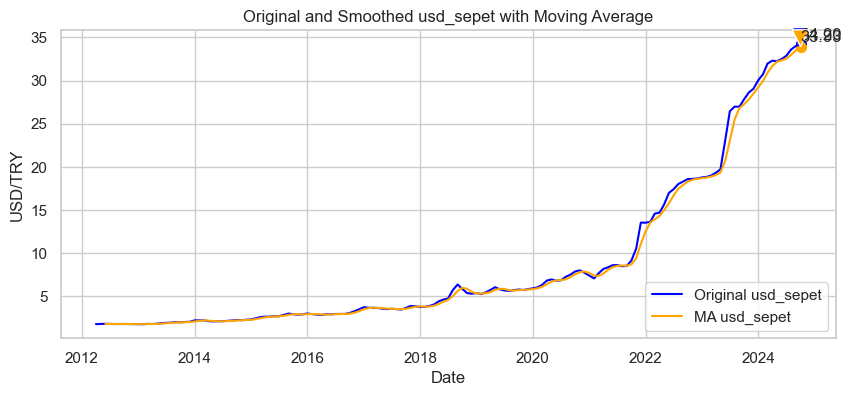

Last observed value of usd_sepet: 34.20
Last estimated value of MA usd_sepet: 33.93


In [158]:
# Hareketli ortalama hesaplama (örneğin, 3 aylık hareketli ortalama)
foreign_dataset['usd_sepet_ma'] = foreign_dataset['usd_sepet'].rolling(window=3).mean()

plt.figure(figsize=(10, 4))
# Orijinal usd_sepet verisi
plt.plot(foreign_dataset.index, foreign_dataset['usd_sepet'], label='Original usd_sepet', color='blue')
# Smooth edilen usd_sepet (3 aylık hareketli ortalama)
plt.plot(foreign_dataset.index, foreign_dataset['usd_sepet_ma'], label='MA usd_sepet', color='orange')

# Son gözlemleri işaretleme
last_date = foreign_dataset.index[-1]
last_usd_sepet = foreign_dataset['usd_sepet'].iloc[-1]
last_usd_sepet_ma = foreign_dataset['usd_sepet_ma'].iloc[-1]

# Orijinal veri setinin son gözlemi
plt.scatter(last_date, last_usd_sepet, color='blue', s=50)
plt.annotate(f'{last_usd_sepet:.2f}', 
             xy=(last_date, last_usd_sepet), 
             xytext=(last_date, last_usd_sepet + 0.5),
             arrowprops=dict(facecolor='blue', shrink=0.05))
# Hareketli ortalama veri setinin son gözlemi
plt.scatter(last_date, last_usd_sepet_ma, color='orange', s=50)
plt.annotate(f'{last_usd_sepet_ma:.2f}', 
             xy=(last_date, last_usd_sepet_ma), 
             xytext=(last_date, last_usd_sepet_ma + 0.5),
             arrowprops=dict(facecolor='orange', shrink=0.05))

plt.xlabel('Date')
plt.ylabel('USD/TRY')
plt.title('Original and Smoothed usd_sepet with Moving Average')
plt.legend(loc="lower right")
plt.show()

# Tahmin edilen MA ve orijinal usd_sepet son değerlerini yazdırma
print(f"Last observed value of usd_sepet: {last_usd_sepet:.2f}")
print(f"Last estimated value of MA usd_sepet: {last_usd_sepet_ma:.2f}")
